In [4]:
import pandas as pd

file_path = r'C:\Users\jacob\Downloads\dataForJacob.xlsx'
df = pd.read_excel(file_path)

df.head()

,Protein,MWt,Net_C,GRAVY,Cys-N,Instab,Sol,Aliphat,Tz_RNA,Bz_RNA,Sp_RNA,RNA_Mean,T-cell Score,Exposed,Linear_B,Conf_B,UnderPS
0,TGRH88_000020,0.0077,0.0245,0.6922,0.0140,0.1523,0.4444,0.6385,0.0005,0.0057,0.0014,0.003,0.0192,1.000,0.0000,0.1229,0.0
1,TGRH88_000030,0.0344,0.0142,0.6225,0.0335,0.2865,0.9697,0.3993,0.0002,0.0000,0.0000,0.000,0.0883,0.001,0.0615,0.2543,0.0
2,TGRH88_000040,0.0328,0.0038,0.6529,0.0335,0.2459,0.0101,0.5790,0.0092,0.0023,0.0028,0.005,0.1130,0.398,0.0000,0.2111,0.0
3,TGRH88_000050,0.0078,0.0108,0.9100,0.0056,0.2017,0.4747,0.5287,0.0073,0.0032,0.0007,0.004,0.0425,0.998,0.0000,0.0844,0.0
4,TGRH88_000060,0.0103,0.0176,0.5681,0.0056,0.3390,0.6162,0.3923,0.0042,0.0042,0.0019,0.003,0.0148,0.001,0.0000,0.1032,0.0


In [5]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.drop_duplicates()

original_row_count = len(df)
cleaned_row_count = len(df_cleaned)
print(f"Original row count: {original_row_count}, Cleaned row count: {cleaned_row_count}")

Original row count: 8147, Cleaned row count: 8147


In [14]:
df_cleaned['Cys-N'] = df_cleaned['Cys-N'] / df_cleaned['MWt']

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
features_to_normalize = df_cleaned.drop(columns=['Protein'])

# Store column names before converting to NumPy array
column_names = features_to_normalize.columns

# Replace infinite or large values with a finite value
features_to_normalize = np.nan_to_num(features_to_normalize, nan=0, posinf=1e15, neginf=-1e15)

# Apply Min-Max normalization
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)

# Convert back to DataFrame for convenience
normalized_features_df = pd.DataFrame(normalized_features, columns=column_names)

# Include the Protein column back into the DataFrame
final_normalized_df = pd.concat([df_cleaned['Protein'], normalized_features_df], axis=1)

# Display the first few rows of the final normalized DataFrame
final_normalized_df.head()

,Protein,MWt,Net_C,GRAVY,Cys-N,Instab,Sol,Aliphat,Tz_RNA,Bz_RNA,Sp_RNA,RNA_Mean,T-cell Score,Exposed,Linear_B,Conf_B,UnderPS
0,TGRH88_000020,0.0077,0.0245,0.6922,2.361275e-13,0.1523,0.4444,0.6385,0.0005,0.0057,0.0014,0.004184,0.0192,1.000000,0.0000,0.1229,0.0
1,TGRH88_000030,0.0344,0.0142,0.6225,2.830922e-14,0.2865,0.9697,0.3993,0.0002,0.0000,0.0000,0.000000,0.0883,0.000000,0.0615,0.2543,0.0
2,TGRH88_000040,0.0328,0.0038,0.6529,3.113846e-14,0.2459,0.0101,0.5790,0.0092,0.0023,0.0028,0.006974,0.1130,0.397397,0.0000,0.2111,0.0
3,TGRH88_000050,0.0078,0.0108,0.9100,9.204471e-14,0.2017,0.4747,0.5287,0.0073,0.0032,0.0007,0.005579,0.0425,0.997998,0.0000,0.0844,0.0
4,TGRH88_000060,0.0103,0.0176,0.5681,5.278537e-14,0.3390,0.6162,0.3923,0.0042,0.0042,0.0019,0.004184,0.0148,0.000000,0.0000,0.1032,0.0


In [16]:
output_file_path = r'C:\Users\jacob\Downloads\final_normalized_data.xlsx'
final_normalized_df.to_excel(output_file_path, index=False)


In [7]:
output_excel_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/final_normalized_data.xlsx'
final_normalized_df = pd.read_excel(output_excel_path)

correlation_matrix = final_normalized_df.drop(columns=['Protein']).corr()

print(correlation_matrix)

                   MWt     Net_C     GRAVY     Cys-N    Instab       Sol  \
MWt           1.000000  0.471514 -0.144605 -0.009210 -0.021411 -0.081263   
Net_C         0.471514  1.000000 -0.241026 -0.001511 -0.014709 -0.021354   
GRAVY        -0.144605 -0.241026  1.000000 -0.023925 -0.004355  0.014421   
Cys-N        -0.009210 -0.001511 -0.023925  1.000000 -0.002790 -0.008485   
Instab       -0.021411 -0.014709 -0.004355 -0.002790  1.000000  0.017687   
Sol          -0.081263 -0.021354  0.014421 -0.008485  0.017687  1.000000   
Aliphat       0.008235  0.003199  0.016048  0.000244 -0.473152 -0.006763   
Tz_RNA       -0.024816 -0.009540  0.045148 -0.003907 -0.012824  0.003111   
Bz_RNA       -0.079881 -0.048533  0.030762 -0.002229  0.000931  0.006869   
Sp_RNA       -0.046343 -0.009765  0.003922 -0.002332 -0.007503 -0.003956   
RNA_Mean     -0.055062 -0.025145  0.039704 -0.003828 -0.009875  0.003326   
T-cell Score  0.837951  0.331224  0.077289 -0.010218 -0.009989 -0.046476   
Exposed     

In [8]:
# Identify features with high correlation
high_corr_features = [(i, j, correlation_matrix.loc[i, j])
                      for i in correlation_matrix.columns
                      for j in correlation_matrix.columns
                      if i != j and abs(correlation_matrix.loc[i, j]) > 0.8]

print(high_corr_features)


[('MWt', 'T-cell Score', 0.8379505719864082), ('Tz_RNA', 'RNA_Mean', 0.9326135534333466), ('RNA_Mean', 'Tz_RNA', 0.9326135534333466), ('T-cell Score', 'MWt', 0.8379505719864082)]


In [2]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the final normalized data
output_excel_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/final_normalized_data.xlsx'
final_normalized_df = pd.read_excel(output_excel_path)

# Remove highly correlated features
features_to_remove = ['MWt', 'RNA_Mean']
reduced_df = final_normalized_df.drop(columns=features_to_remove)

features_for_pca = reduced_df.drop(columns=['Protein'])

# Apply PCA
pca = PCA(n_components=5)
reduced_features = pca.fit_transform(features_for_pca)

# Extract PCA loadings
loadings = pd.DataFrame(pca.components_.T, index=features_for_pca.columns, columns=[f'PC{i}' for i in range(1, 6)])

# Save the loadings to an Excel file
output_loadings_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/pca_loadings.xlsx'
loadings.to_excel(output_loadings_path, index=True)
print("PCA loadings saved to:", output_loadings_path)


PCA loadings saved to: C:/Users/jacob/OneDrive/Desktop/CattleRanking/pca_loadings.xlsx


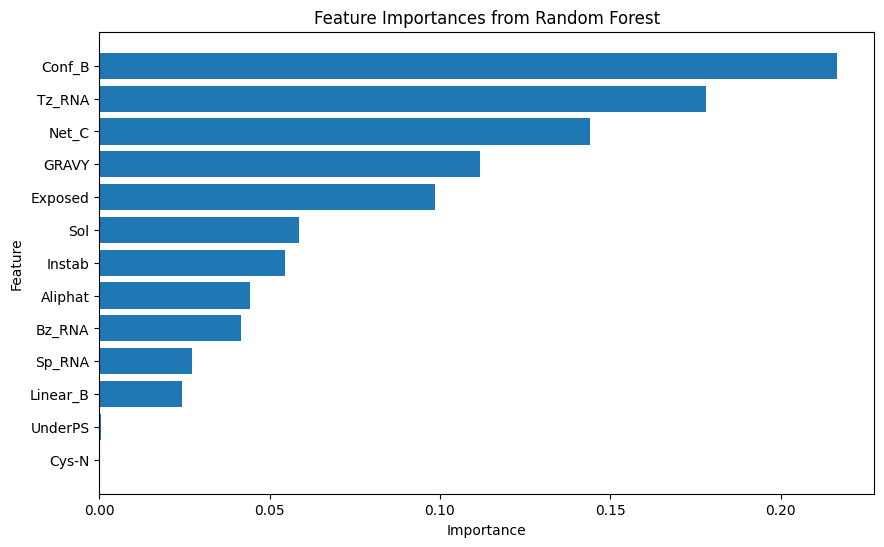

OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Drop the non-numeric 'Protein' column
features = data.drop(columns=['Protein', 'T-cell Score'])
target = data['T-cell Score']

# Apply StandardScaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Determine feature importance
feature_importances = rf_model.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

# Save the feature importances
importance_output_path = '/mnt/data/feature_importances.xlsx'
importance_df.to_excel(importance_output_path, index=False)
print(f"Feature importances saved to: {importance_output_path}")

# Ensure biologically important features are included
biologically_important_features = ['Conf_B', 'Linear_B']
selected_features = list(importance_df.head(5)['Feature'].values)

# Add biologically important features if they are not already included
for feature in biologically_important_features:
    if feature not in selected_features:
        selected_features.append(feature)

# Create a DataFrame with selected features
selected_features_df = data[selected_features]

# Save the selected features
selected_features_output_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRankingselected_features.xlsx'
selected_features_df.to_excel(selected_features_output_path, index=False)
print(f"Selected features saved to: {selected_features_output_path}")


In [1]:
import pandas as pd
from scipy.stats import rankdata

file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Calculate Borda scores (sum of ranks for each cattle entry)
ranks['Borda_Score'] = ranks.sum(axis=1)

# Determine final ranking based on Borda scores
ranks['Final_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# Add the identifier back to the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Sort the data based on final ranking
ranked_data = selected_data.copy()
ranked_data['Borda_Score'] = ranks['Borda_Score']
ranked_data['Final_Rank'] = ranks['Final_Rank']
ranked_data = ranked_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda.xlsx


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Transpose the data to have lists as columns for RRA
ranked_lists = ranks.transpose()

# Perform RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

# Convert ranked_lists to a numpy array
ranked_lists_np = ranked_lists.values

# Perform RRA
aggregated_ranks = aggregate_ranks(ranked_lists_np)

# Create a DataFrame for aggregated ranks
aggregated_ranks_df = pd.DataFrame({
    identifier: selected_data[identifier],
    'Aggregated_Rank': aggregated_ranks
})

# Merge the aggregated ranks with the selected data
final_df = selected_data.merge(aggregated_ranks_df, on=identifier)

# Sort the data based on aggregated ranks
final_df = final_df.sort_values(by='Aggregated_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_rra.xlsx'
final_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_rra.xlsx


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

def copeland_score(data):
    # Converts the data into a numpy array
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

# Calculate Copeland scores
copeland_scores = copeland_score(selected_data[selected_features])

# Add Copeland scores to the DataFrame
selected_data['Copeland_Score'] = copeland_scores

# Determine final ranking based on Copeland scores
selected_data['Final_Rank'] = rankdata(-selected_data['Copeland_Score'], method='min')

# Sort the data based on final ranking
ranked_data = selected_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\/cattle_ranked_by_copeland.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)

print(f'Ranked cattle data saved to: {ranked_output_path}')

C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\421831385.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Copeland_Score'] = copeland_scores
C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\421831385.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Final_Rank'] = rankdata(-selected_data['Copeland_Score'], method='min')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\/cattle_ranked_by_copeland.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

# Calculate MC4 scores
mc4_scores = mc4_ranking(selected_data[selected_features])

# Add MC4 scores to the DataFrame
selected_data['MC4_Score'] = mc4_scores

# Determine final ranking based on MC4 scores
selected_data['Final_Rank'] = rankdata(-selected_data['MC4_Score'], method='min')

# Sort the data based on final ranking
ranked_data = selected_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)

print(f'Ranked cattle data saved to: {ranked_output_path}')

C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\2795701870.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Score'] = mc4_scores
C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\2795701870.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Final_Rank'] = rankdata(-selected_data['MC4_Score'], method='min')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm

file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Borda Count
ranks['Borda_Score'] = ranks.sum(axis=1)
ranks['Borda_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

ranked_lists_np = ranks[selected_features].transpose().values
rra_ranks = aggregate_ranks(ranked_lists_np)
ranks['RRA_Rank'] = rra_ranks

# Copeland's Method
def copeland_score(data):
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

copeland_scores = copeland_score(selected_data[selected_features])
ranks['Copeland_Score'] = copeland_scores
ranks['Copeland_Rank'] = rankdata(-ranks['Copeland_Score'], method='min')

# MC4 Method
def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

mc4_scores = mc4_ranking(selected_data[selected_features])
ranks['MC4_Score'] = mc4_scores
ranks['MC4_Rank'] = rankdata(-ranks['MC4_Score'], method='min')

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Calculate the final consensus ranking
ranks['Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Consensus_Rank'] = rankdata(ranks['Consensus_Score'], method='min')

# Merge the consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Consensus_Rank']], on=identifier)

# Sort the data based on consensus ranking
final_df = final_df.sort_values(by='Consensus_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus.xlsx'
final_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus.xlsx


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\fake_cattle_rank.xlsx'
final_df = pd.read_excel(ranked_output_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'

# Split data into train and test sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

# Prepare training data
X_train = train_data[selected_features]
y_train = train_data['Consensus_Rank']

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prepare test data
X_test = test_data[selected_features]
y_test = test_data['Consensus_Rank']

# Predictions
y_pred = regressor.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate residual standard error (RSE)
rse = np.std(residuals)

#Calculate prediction intervals at a certain confidence level
confidence_level = 0.95
df = len(X_test) - X_test.shape[1] - 1  # degrees of freedom
t = stats.t.ppf((1 + confidence_level) / 2, df)
prediction_interval = t * rse

# Calculate the percentage of confidence
confidence_percent = 100 * (1 - rse / np.std(y_test))

print(f"Residual Standard Error (RSE): {rse}")
print(f"Model Confidence Level: {confidence_percent:.2f}%")

#ordinal regression - packages avaliable (statmodels, mord)
#John didn't split. Looked how it changes when you look at different approaches. Was looking at different orders.

#try 5-10 sets of data
#Toy datapoints Ranking 1-10. 1-10, 1-10, 1-10, 1-10, 1-10. Should get result back the same when you retry the model. Engineer some ranks.
#use a smaller dataset to test the model



Residual Standard Error (RSE): 3.4623778669364755
Model Confidence Level: 27.63%


In [26]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mord import OrdinalRidge
from mapie.regression import MapieRegressor
from quantile_forest import RandomForestQuantileRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Borda Count
ranks['Borda_Score'] = ranks.sum(axis=1)
ranks['Borda_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

ranked_lists_np = ranks[selected_features].transpose().values
rra_ranks = aggregate_ranks(ranked_lists_np)
ranks['RRA_Rank'] = rra_ranks

# Copeland's Method
def copeland_score(data):
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

copeland_scores = copeland_score(selected_data[selected_features])
ranks['Copeland_Score'] = copeland_scores
ranks['Copeland_Rank'] = rankdata(-ranks['Copeland_Score'], method='min')

# MC4 Method
def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

mc4_scores = mc4_ranking(selected_data[selected_features])
ranks['MC4_Score'] = mc4_scores
ranks['MC4_Rank'] = rankdata(-ranks['MC4_Score'], method='min')

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Calculate the final consensus ranking
ranks['Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Consensus_Rank'] = rankdata(ranks['Consensus_Score'], method='min')

# Merge the consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Consensus_Rank']], on=identifier)

# Split data into training, testing, and calibration sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)
train_data, cal_data = train_test_split(train_data, test_size=0.25, random_state=42)

X_train = train_data[selected_features]
y_train = train_data['Consensus_Rank']
X_cal = cal_data[selected_features]
y_cal = cal_data['Consensus_Rank']
X_test = test_data[selected_features]
y_test = test_data['Consensus_Rank']

# Fit models using Random Forest Regressor and Ordinal Ridge Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
ord_regressor = OrdinalRidge()

rf_regressor.fit(X_train, y_train)
ord_regressor.fit(X_train, y_train)

# Apply MAPIE for conformal prediction
mapie_rf = MapieRegressor(rf_regressor, method="minmax", cv="prefit")
mapie_rf.fit(X_cal, y_cal)
predictions_rf, intervals_rf = mapie_rf.predict(X_test, alpha=0.05)
lower_bounds_rf, upper_bounds_rf = intervals_rf[:, 0], intervals_rf[:, 1]

mapie_ord = MapieRegressor(ord_regressor, method="minmax", cv="prefit")
mapie_ord.fit(X_cal, y_cal)
predictions_ord, intervals_ord = mapie_ord.predict(X_test, alpha=0.05)
lower_bounds_ord, upper_bounds_ord = intervals_ord[:, 0], intervals_ord[:, 1]

# Apply Quantile Regression for conformal prediction
quantile_regressor = RandomForestQuantileRegressor(n_estimators=100, max_depth=15, max_features=5, random_state=42)
quantile_regressor.fit(X_train, y_train)
quantiles = [0.025, 0.5, 0.975]
predictions_qr = quantile_regressor.predict(X_test, quantiles)

# Calculate and print evaluation metrics for the models
def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MAE: {mae}, RMSE: {rmse}, R2: {r2}')

print_metrics("Random Forest", y_test, predictions_rf)
print_metrics("Ordinal Ridge", y_test, predictions_ord)
print_metrics("Quantile Regression", y_test, predictions_qr[:, 1])

# Add prediction intervals to the final dataframe
test_data['Predicted_Rank_RF'] = predictions_rf
test_data['Lower_Bound_RF'] = lower_bounds_rf
test_data['Upper_Bound_RF'] = upper_bounds_rf

test_data['Predicted_Rank_ORD'] = predictions_ord
test_data['Lower_Bound_ORD'] = lower_bounds_ord
test_data['Upper_Bound_ORD'] = upper_bounds_ord

test_data['Predicted_Rank_QR'] = predictions_qr[:, 1]
test_data['Lower_Bound_QR'] = predictions_qr[:, 0]
test_data['Upper_Bound_QR'] = predictions_qr[:, 2]

# Save the final ranked data with prediction intervals
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus_with_prediction_intervals.xlsx'
test_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data with prediction intervals saved to: {ranked_output_path}')


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestQuantileRegressor was fitted without feature names
  warnings.warn(


Random Forest - MAE: 360.26570552147246, RMSE: 528.733319506923, R2: 0.9504084582900977
Ordinal Ridge - MAE: 872.0030674846626, RMSE: 1077.9498266776409, R2: 0.7938746789734383
Quantile Regression - MAE: 314.20828220858897, RMSE: 511.997499125171, R2: 0.9534981821909267
Ranked cattle data with prediction intervals saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus_with_prediction_intervals.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mord import OrdinalRidge
from mapie.regression import MapieRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Calculate the initial consensus ranking
ranks['Initial_Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Initial_Consensus_Rank'] = rankdata(ranks['Initial_Consensus_Score'], method='min')

# Merge the initial consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Initial_Consensus_Rank']], on=identifier)

# Split data into training, testing, and calibration sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)
train_data, cal_data = train_test_split(train_data, test_size=0.25, random_state=42)

X_train = train_data[selected_features]
y_train = train_data['Initial_Consensus_Rank']
X_cal = cal_data[selected_features]
y_cal = cal_data['Initial_Consensus_Rank']
X_test = test_data[selected_features]
y_test = test_data['Initial_Consensus_Rank']

# Fit models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
ord_regressor = OrdinalRidge()

rf_regressor.fit(X_train, y_train)
ord_regressor.fit(X_train, y_train)

# Apply MAPIE for conformal prediction
mapie_rf = MapieRegressor(rf_regressor, method="minmax", cv="prefit")
mapie_rf.fit(X_cal, y_cal)
predictions_rf, intervals_rf = mapie_rf.predict(X_test, alpha=0.05)
lower_bounds_rf, upper_bounds_rf = intervals_rf[:, 0], intervals_rf[:, 1]

mapie_ord = MapieRegressor(ord_regressor, method="minmax", cv="prefit")
mapie_ord.fit(X_cal, y_cal)
predictions_ord, intervals_ord = mapie_ord.predict(X_test, alpha=0.05)
lower_bounds_ord, upper_bounds_ord = intervals_ord[:, 0], intervals_ord[:, 1]

# Add prediction intervals to the test dataframe
test_data['RF_Rank'] = predictions_rf
test_data['RF_Lower'] = lower_bounds_rf
test_data['RF_Upper'] = upper_bounds_rf

test_data['ORD_Rank'] = predictions_ord
test_data['ORD_Lower'] = lower_bounds_ord
test_data['ORD_Upper'] = upper_bounds_ord

# Calculate final consensus rank based on the average of RF and ORD predictions
test_data['Final_Consensus_Score'] = test_data[['RF_Rank', 'ORD_Rank']].mean(axis=1)
test_data['Final_Consensus_Rank'] = rankdata(test_data['Final_Consensus_Score'], method='min')

# Calculate the lower and upper bounds for the final consensus rank
test_data['Final_Lower'] = test_data[['RF_Lower', 'ORD_Lower']].min(axis=1)
test_data['Final_Upper'] = test_data[['RF_Upper', 'ORD_Upper']].max(axis=1)

# Save the final ranked data with prediction intervals
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_with_conformal_prediction_2.xlsx'
test_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data with conformal prediction intervals saved to: {ranked_output_path}')

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


Ranked cattle data with conformal prediction intervals saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_with_conformal_prediction_2.xlsx


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Convert the ranks DataFrame to a NumPy array
rank_matrix = ranks.values

# Compute the Borda Count using ranky with reverse ranking
borda_ranks = rk.borda(rank_matrix, reverse=True)

# Ensure Borda ranks are interpreted consistently with manual ranking
borda_ranks_inverted = rankdata(borda_ranks, method='ordinal')

# Add Borda ranks to the DataFrame
ranks['Borda_Rank'] = borda_ranks_inverted

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Sort the DataFrame by Borda Rank
ranks = ranks.sort_values(by='Borda_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'
ranks.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx


In [21]:
import pandas as pd
import numpy as np
import ranky as rk

# Step 1: Load preprocessed ranks from different methods
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

vikor_ranks = pd.read_excel(vikor_file)
edas_ranks = pd.read_excel(edas_file)
spotis_ranks = pd.read_excel(spotis_file)
ranky_score_ranks = pd.read_excel(ranky_score_file)
ranky_rank_ranks = pd.read_excel(ranky_rank_file)

# Step 2: Combine ranks into a single DataFrame
combined_ranks = vikor_ranks[['Protein', 'VIKOR_Rank']].merge(
    edas_ranks[['Protein', 'EDAS_Rank']], on='Protein'
).merge(
    spotis_ranks[['Protein', 'SPOTIS_Rank']], on='Protein'
).merge(
    ranky_score_ranks[['Protein', 'Final_Rank']], on='Protein'
).merge(
    ranky_rank_ranks[['Protein', 'Final_Rank']], on='Protein', suffixes=('_Score', '_Rank')
)

# Step 3: Prepare rank matrix for Copeland method
rank_matrix = combined_ranks[['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']].values

# Step 4: Apply Copeland method
copeland_scores = rk.copeland(rank_matrix)

# Step 5: Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks['Protein'],
    'Copeland_Score': copeland_scores
})

# Step 6: Assign Copeland ranks (lower rank is better)
results['Copeland_Rank'] = results['Copeland_Score'].rank(method='min')

# Step 7: Sort by Copeland rank
results = results.sort_values('Copeland_Rank')

# Step 8: Display top 10 results
print("Top 10 proteins by Copeland ranking:")
print(results.head(10))

# Step 9: Save results to Excel
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\copeland_results_from_preprocessed.xlsx'
results.to_excel(output_path, index=False)
print(f"\nResults saved to: {output_path}")

# Step 10: Calculate correlations between different ranking methods and Copeland ranking
correlations = combined_ranks[['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']].corrwith(results.set_index('Protein')['Copeland_Rank'])
print("\nCorrelations between different ranking methods and Copeland ranking:")
print(correlations)

KeyError: "['Final_Rank'] not in index"

In [1]:
import pandas as pd
from mc4.algorithm import mc4_aggregator

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Verify data loading
print("Data loaded successfully:")
print(data.head())

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Verify data subsetting
print("\nSelected data subset:")
print(selected_data.head())

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Verify ranking
print("\nRanks for each feature:")
print(ranks.head())

# Prepare the data for MC4
rank_matrix_df = pd.DataFrame(ranks, columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]

# Verify the prepared rank matrix
print("\nRank matrix prepared for MC4:")
print(rank_matrix_df.head())

# Perform MC4 aggregation
aggregated_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Verify the length of aggregated ranks
print("\nAggregated ranks:")
print(aggregated_ranks)
if len(aggregated_ranks) != len(selected_data):
    raise ValueError("The number of aggregated ranks does not match the number of items in the dataset.")

# Add MC4 ranks to the original DataFrame
selected_data['MC4_Rank'] = pd.Series(aggregated_ranks, index=selected_data.index)

# Verify the added MC4 ranks
print("\nSelected data with MC4 ranks added:")
print(selected_data.head())

# Convert MC4 ranks to linear numbers
selected_data['MC4_Rank'] = selected_data['MC4_Rank'].rank()

# Verify linear rank conversion
print("\nMC4 ranks converted to linear numbers:")
print(selected_data.head())

# Sort the DataFrame by MC4 Rank
selected_data = selected_data.sort_values(by='MC4_Rank')

# Verify sorted data
print("\nData sorted by MC4 ranks:")
print(selected_data.head())

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
selected_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Data loaded successfully:
         Protein   Net_C   GRAVY         Cys-N  Instab     Sol  Aliphat  \
0  TGRH88_000020  0.0245  0.6922  2.361275e-13  0.1523  0.4444   0.6385   
1  TGRH88_000030  0.0142  0.6225  2.830922e-14  0.2865  0.9697   0.3993   
2  TGRH88_000040  0.0038  0.6529  3.113846e-14  0.2459  0.0101   0.5790   
3  TGRH88_000050  0.0108  0.9100  9.204471e-14  0.2017  0.4747   0.5287   
4  TGRH88_000060  0.0176  0.5681  5.278537e-14  0.3390  0.6162   0.3923   

   Tz_RNA  Bz_RNA  Sp_RNA  T-cell Score   Exposed  Linear_B  Conf_B  UnderPS  
0  0.0005  0.0057  0.0014        0.0192  1.000000    0.0000  0.1229      0.0  
1  0.0002  0.0000  0.0000        0.0883  0.000000    0.0615  0.2543      0.0  
2  0.0092  0.0023  0.0028        0.1130  0.397397    0.0000  0.2111      0.0  
3  0.0073  0.0032  0.0007        0.0425  0.997998    0.0000  0.0844      0.0  
4  0.0042  0.0042  0.0019        0.0148  0.000000    0.0000  0.1032      0.0  

Selected data subset:
         Protein  Conf_B  

C:\Users\jacob\AppData\Local\Temp\ipykernel_11560\2493966225.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Rank'] = pd.Series(aggregated_ranks, index=selected_data.index)
C:\Users\jacob\AppData\Local\Temp\ipykernel_11560\2493966225.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Rank'] = selected_data['MC4_Rank'].rank()


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature
ranked_data = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal'))

# Convert the ranked data back to a DataFrame
ranked_df = pd.DataFrame(ranked_data, columns=selected_features)

# Add the identifier back to the ranked DataFrame
ranked_df[identifier] = selected_data[identifier]

# Sum the ranks across all features to get the final ranking
ranked_df['Total_Rank'] = ranked_df[selected_features].sum(axis=1)

# Sort the DataFrame by the total rank
ranked_df = ranked_df.sort_values(by='Total_Rank')

# Assign a final rank based on the sorted total rank
ranked_df['Final_Rank'] = rankdata(ranked_df['Total_Rank'], method='ordinal')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
ranked_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx


In [24]:
import pandas as pd
from corankco.consensus import Consensus

# Load ranked data from Ranky, MC4, Copeland, and Borda methods
file_path_ranky = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
file_path_mc4 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
file_path_copeland = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx'
file_path_borda = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'

ranked_data_ranky = pd.read_excel(file_path_ranky)
ranked_data_mc4 = pd.read_excel(file_path_mc4)
ranked_data_copeland = pd.read_excel(file_path_copeland)
ranked_data_borda = pd.read_excel(file_path_borda)

# Extract rankings
rankings_ranky = ranked_data_ranky['Final_Rank'].tolist()
rankings_mc4 = ranked_data_mc4['MC4_Rank'].tolist()
rankings_copeland = ranked_data_copeland['Copeland_Rank'].tolist()
rankings_borda = ranked_data_borda['Borda_Rank'].tolist()

# Combine rankings into a list of lists of sets
combined_rankings = [
    [{i} for i in rankings_ranky],
    [{i} for i in rankings_mc4],
    [{i} for i in rankings_copeland],
    [{i} for i in rankings_borda]
]

# Create Consensus object
consensus = Consensus.from_raw_lists(combined_rankings)

# Get consensus rankings
consensus_rankings = consensus.consensus_rankings

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings[0]]
consensus_df = pd.DataFrame({'Consensus_Rank': consensus_ranks})

# Add the 'Protein' identifier
consensus_df[identifier] = ranked_data_ranky[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx


In [18]:
import pandas as pd
import ranky

# Load ranked data from Ranky, MC4, Copeland, and Borda methods
file_path_ranky = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
file_path_mc4 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
file_path_copeland = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx'
file_path_borda = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'

ranked_data_ranky = pd.read_excel(file_path_ranky)
ranked_data_mc4 = pd.read_excel(file_path_mc4)
ranked_data_copeland = pd.read_excel(file_path_copeland)
ranked_data_borda = pd.read_excel(file_path_borda)

# Extract rankings
rankings_ranky = ranked_data_ranky['Final_Rank'].tolist()
rankings_mc4 = ranked_data_mc4['MC4_Rank'].tolist()
rankings_copeland = ranked_data_copeland['Copeland_Rank'].tolist()
rankings_borda = ranked_data_borda['Borda_Rank'].tolist()

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': rankings_ranky,
    'MC4': rankings_mc4,
    'Copeland': rankings_copeland,
    'Borda': rankings_borda
})

# Apply the consensus ranking using ranky
# Ensure the function call matches the library's expected usage
consensus_ranking = ranky.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Protein' identifier
identifier = 'Protein'  # Replace with your actual identifier column name
consensus_df[identifier] = ranked_data_ranky[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx


Spearman Rank Correlation between the two models: -0.5989781582518714
Differences in rankings saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\rank_differences.xlsx


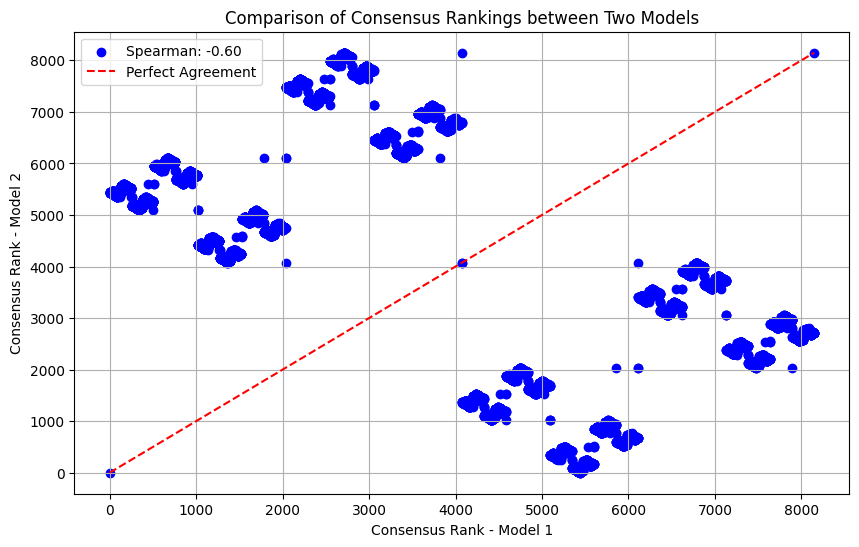

In [6]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load the rankings from the Excel files
file_path_model1 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx'
file_path_model2 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx'

df_model1 = pd.read_excel(file_path_model1)
df_model2 = pd.read_excel(file_path_model2)

# Merge DataFrames on 'Protein' using the correct column names
df_merged = pd.merge(df_model1[['Protein', 'Consensus_Rank']], df_model2[['Protein', 'Consensus_Rank']],
                     on='Protein', suffixes=('_model1', '_model2'))

# Calculate Spearman's rank correlation between the two sets of rankings
spearman_corr, _ = spearmanr(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'])
print(f'Spearman Rank Correlation between the two models: {spearman_corr}')

# Calculate the differences in rankings
df_merged['Rank_Difference'] = df_merged['Consensus_Rank_model1'] - df_merged['Consensus_Rank_model2']

# Save the DataFrame with differences to an Excel file
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\rank_differences.xlsx'
df_merged.to_excel(output_file_path, index=False)
print(f'Differences in rankings saved to {output_file_path}')

# Plotting the rankings
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'], color='blue', label=f'Spearman: {spearman_corr:.2f}')
plt.plot([df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         [df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         color='red', linestyle='--', label='Perfect Agreement')

plt.title('Comparison of Consensus Rankings between Two Models')
plt.xlabel('Consensus Rank - Model 1')
plt.ylabel('Consensus Rank - Model 2')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': ranky_ranks.tolist(),
    'MC4': list(mc4_ranks),
    'Copeland': copeland_ranks.tolist(),
    'Borda': borda_ranks.tolist()
})

# Apply the consensus ranking using ranky
consensus_ranking = rk.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Protein' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky_3.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky_2.xlsx


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a list of lists
combined_rankings = [
    [{i} for i in ranky_ranks.tolist()],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks.tolist()],
    [{i} for i in borda_ranks.tolist()]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks
})

# Add the 'Protein' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_2.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


In [20]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator

# Load the toy dataset (student performance)
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank4.xlsx'
data = pd.read_excel(file_path)

# Define selected features related to student performance
selected_features = ['Math Score', 'English Score', 'Science Score', 'Overall Score']
identifier = 'Student ID'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': ranky_ranks.tolist(),
    'MC4': list(mc4_ranks),
    'Copeland': copeland_ranks.tolist(),
    'Borda': borda_ranks.tolist()
})

# Apply the consensus ranking using ranky
consensus_ranking = rk.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Student' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_ranky.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked student data saved to: {consensus_output_path}')


Consensus ranked student data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_ranky.xlsx


In [17]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus

# Load the toy dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank4.xlsx'
toy_data = pd.read_excel(file_path)

# Define selected features and identifier for the toy dataset
selected_features = ['Math Score', 'English Score', 'Science Score']
identifier = 'Student ID'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_toy_data = toy_data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_toy_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_toy_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_toy_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Ensure each ranking method generates a unique ranking by applying ordinal ranking again
ranky_ranks = rankdata(ranky_ranks, method='ordinal')
mc4_ranks = rankdata(mc4_ranks, method='ordinal')
copeland_ranks = rankdata(copeland_ranks, method='ordinal')
borda_ranks = rankdata(borda_ranks, method='ordinal')

# Convert numpy.int64 to regular Python int
ranky_ranks = [int(x) for x in ranky_ranks]
mc4_ranks = [int(x) for x in mc4_ranks]
copeland_ranks = [int(x) for x in copeland_ranks]
borda_ranks = [int(x) for x in borda_ranks]

# Combine rankings into a list of lists for CoRankCo
combined_rankings = [
    [{i} for i in ranky_ranks],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks],
    [{i} for i in borda_ranks]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks
})

# Add the 'Student_ID' identifier
consensus_df[identifier] = selected_toy_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the final consensus ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column (optional, for clean output)
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data to Excel
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_corankco.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked toy data saved to: {consensus_output_path}')

Consensus ranked toy data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_corankco.xlsx


In [5]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
large_data = pd.read_excel(file_path)

# Define selected features and identifier
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_large_data = large_data[selected_features_with_id]

# Correlation analysis
correlation_matrix = selected_large_data[selected_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# Rank using Ranky
ranky_ranks = selected_large_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_large_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_large_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Ensure each ranking method generates a unique ranking by applying ordinal ranking again
ranky_ranks = rankdata(ranky_ranks, method='ordinal')
mc4_ranks = rankdata(mc4_ranks, method='ordinal')
copeland_ranks = rankdata(copeland_ranks, method='ordinal')
borda_ranks = rankdata(borda_ranks, method='ordinal')

# Convert numpy.int64 to regular Python int
ranky_ranks = [int(x) for x in ranky_ranks]
mc4_ranks = [int(x) for x in mc4_ranks]
copeland_ranks = [int(x) for x in copeland_ranks]
borda_ranks = [int(x) for x in borda_ranks]

# Combine rankings into a list of lists for CoRankCo
combined_rankings = [
    [{i} for i in ranky_ranks],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks],
    [{i} for i in borda_ranks]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a list of integers
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]

# Ensure all rank lists have the same length
max_length = max(len(ranky_ranks), len(mc4_ranks), len(copeland_ranks), len(borda_ranks), len(consensus_ranks))

def pad_ranks(ranks, max_length):
    return ranks + [max_length] * (max_length - len(ranks))

ranky_ranks = pad_ranks(ranky_ranks, max_length)
mc4_ranks = pad_ranks(mc4_ranks, max_length)
copeland_ranks = pad_ranks(copeland_ranks, max_length)
borda_ranks = pad_ranks(borda_ranks, max_length)
consensus_ranks = pad_ranks(consensus_ranks, max_length)

# Create the DataFrame with padded ranks
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks,
    identifier: selected_large_data[identifier].tolist() + [''] * (max_length - len(selected_large_data)),
    'Ranky_Rank': ranky_ranks,
    'MC4_Rank': mc4_ranks,
    'Copeland_Rank': copeland_ranks,
    'Borda_Rank': borda_ranks
})

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the final consensus ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Visualize ranking comparison
plt.figure(figsize=(12, 6))
for method in ['Ranky_Rank', 'MC4_Rank', 'Copeland_Rank', 'Borda_Rank']:
    plt.scatter(consensus_df['Final_Consensus_Rank'], consensus_df[method], alpha=0.5, label=method)
plt.xlabel('Consensus Rank')
plt.ylabel('Method Rank')
plt.title('Comparison of Ranking Methods')
plt.legend()
plt.tight_layout()
plt.savefig('ranking_comparison.png')
plt.close()

# Save the final consensus ranked data to Excel
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_3.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)

print("Consensus ranking completed and saved to:", consensus_output_path)

Consensus ranking completed and saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_3.xlsx


Spearman Rank Correlation between the two models: 0.9999999836891934
Differences in rankings saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\corankco_1_vs_2.xlsx


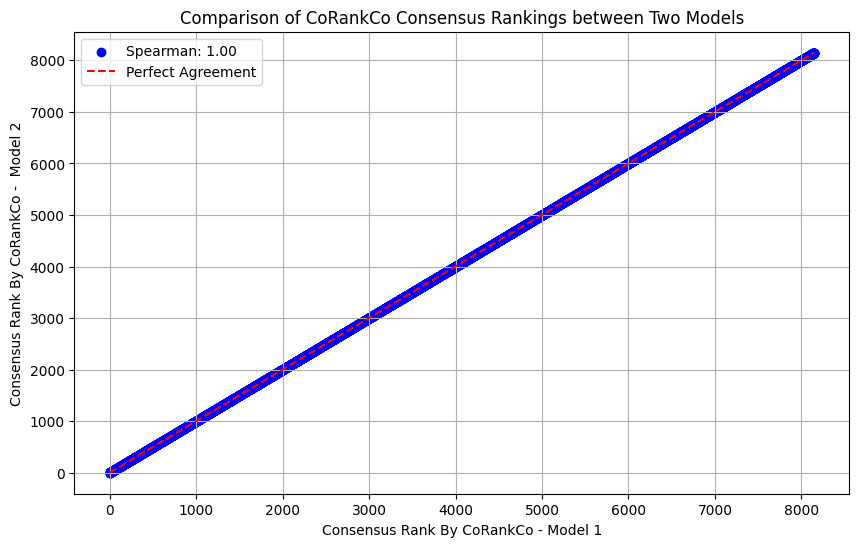

In [11]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load the rankings from the Excel files
file_path_model1 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx'
file_path_model2 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_2.xlsx'

df_model1 = pd.read_excel(file_path_model1)
df_model2 = pd.read_excel(file_path_model2)

# Merge DataFrames on 'Protein' using the correct column names
df_merged = pd.merge(df_model1[['Consensus_Rank', 'Protein']], df_model2[['Protein', 'Consensus_Rank']],
                     on='Protein', suffixes=('_model1', '_model2'))

# Calculate Spearman's rank correlation between the two sets of rankings
spearman_corr, _ = spearmanr(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'])
print(f'Spearman Rank Correlation between the two models: {spearman_corr}')

# Calculate the differences in rankings
df_merged['Rank_Difference'] = df_merged['Consensus_Rank_model1'] - df_merged['Consensus_Rank_model2']

# Save the DataFrame with differences to an Excel file
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\corankco_1_vs_2.xlsx'
df_merged.to_excel(output_file_path, index=False)
print(f'Differences in rankings saved to {output_file_path}')

# Plotting the rankings
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'], color='blue', label=f'Spearman: {spearman_corr:.2f}')
plt.plot([df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         [df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         color='red', linestyle='--', label='Perfect Agreement')

plt.title('Comparison of CoRankCo Consensus Rankings between Two Models')
plt.xlabel('Consensus Rank By CoRankCo - Model 1')
plt.ylabel('Consensus Rank By CoRankCo -  Model 2')
plt.legend()
plt.grid(True)
plt.show()


Spearman Rank Correlation between the two models: 0.0811123717489802
Differences in rankings saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranky_1_vs_2.xlsx


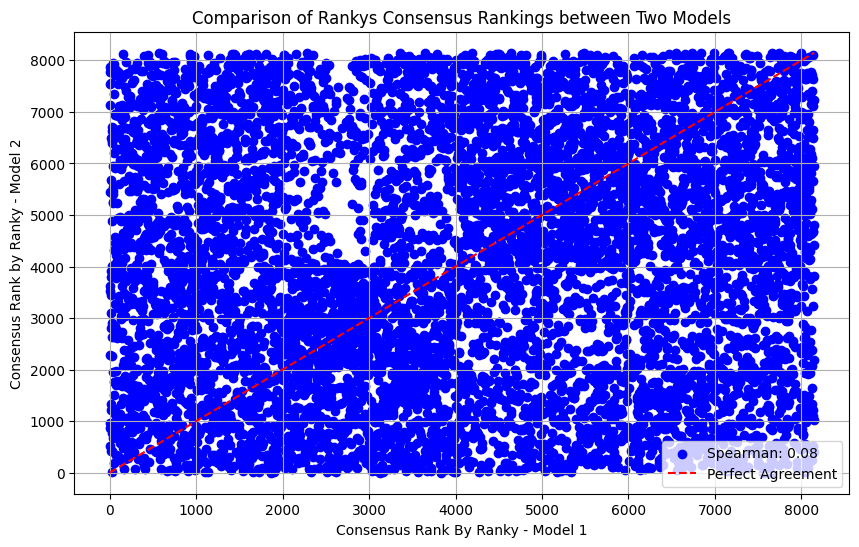

In [12]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load the rankings from the Excel files
file_path_model1 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx'
file_path_model2 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky_2.xlsx'

df_model1 = pd.read_excel(file_path_model1)
df_model2 = pd.read_excel(file_path_model2)

# Merge DataFrames on 'Protein' using the correct column names
df_merged = pd.merge(df_model1[['Consensus_Rank', 'Protein']], df_model2[['Protein', 'Consensus_Rank']],
                     on='Protein', suffixes=('_model1', '_model2'))

# Calculate Spearman's rank correlation between the two sets of rankings
spearman_corr, _ = spearmanr(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'])
print(f'Spearman Rank Correlation between the two models: {spearman_corr}')

# Calculate the differences in rankings
df_merged['Rank_Difference'] = df_merged['Consensus_Rank_model1'] - df_merged['Consensus_Rank_model2']

# Save the DataFrame with differences to an Excel file
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranky_1_vs_2.xlsx'
df_merged.to_excel(output_file_path, index=False)
print(f'Differences in rankings saved to {output_file_path}')

# Plotting the rankings
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'], color='blue', label=f'Spearman: {spearman_corr:.2f}')
plt.plot([df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         [df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         color='red', linestyle='--', label='Perfect Agreement')

plt.title('Comparison of Rankys Consensus Rankings between Two Models')
plt.xlabel('Consensus Rank By Ranky - Model 1')
plt.ylabel('Consensus Rank by Ranky - Model 2')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import ranky as rk
from mc4.algorithm import mc4_aggregator

# Custom median rank function
def median_rank(ranking_matrix):
    return rankdata(np.median(ranking_matrix, axis=1), method='ordinal')

# Load the toy dataset
file_path = r'c:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank3.xlsx'
toy_data = pd.read_excel(file_path)

# Define selected features and identifier
selected_features = ['Math Score', 'English Score', 'Science Score']
identifier = 'Student ID'

# Rank using Borda, Copeland, MC4, Ranky's Rank
borda_ranks = rk.borda(toy_data[selected_features].values, reverse=False)
copeland_ranks = rk.copeland(toy_data[selected_features].values)
mc4_result = mc4_aggregator(pd.DataFrame(toy_data[selected_features].rank(ascending=False)))
mc4_ranks = np.array(list(mc4_result.values()))  # Convert dict to array
ranky_ranks = toy_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Ensure all ranks are 1D arrays
borda_ranks = np.ravel(borda_ranks)
copeland_ranks = np.ravel(copeland_ranks)
mc4_ranks = np.ravel(mc4_ranks)
ranky_ranks = np.ravel(ranky_ranks)

# Convert ranks to ordinal format
borda_ranks = rankdata(borda_ranks, method='ordinal')
copeland_ranks = rankdata(copeland_ranks, method='ordinal')
mc4_ranks = rankdata(mc4_ranks, method='ordinal')
ranky_ranks = rankdata(ranky_ranks, method='ordinal')

# Create a matrix of rankings
ranking_matrix = np.column_stack((borda_ranks, copeland_ranks, mc4_ranks, ranky_ranks))

# Get consensus ranking using median rank
consensus_ranking = median_rank(ranking_matrix)

# Create a DataFrame for the final results
result_df = pd.DataFrame({
    identifier: toy_data[identifier],
    'Borda_Rank': borda_ranks,
    'Copeland_Rank': copeland_ranks,
    'MC4_Rank': mc4_ranks,
    'Ranky_Rank': ranky_ranks,
    'Consensus_Rank': consensus_ranking
})

# Save the final consensus ranked data to Excel
result_df = result_df.sort_values(by='Consensus_Rank').reset_index(drop=True)
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank1_Consensus_Ranky3_Median.xlsx'
result_df.to_excel(output_path, index=False)

print(f"Consensus ranking saved to: {output_path}")
print(result_df)


Consensus ranking saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank1_Consensus_Ranky3_Median.xlsx
   Student ID  Borda_Rank  Copeland_Rank  MC4_Rank  Ranky_Rank  Consensus_Rank
0   Student01           1             20         1           1               1
1   Student02           2             19         2           2               2
2   Student03           3             17         4           3               3
3   Student04           4             18         3           4               4
4   Student05           5             16         5           5               5
5   Student07           6             14         7           6               6
6   Student06           7             15         6           7               7
7   Student08           8             13         8           8               8
8   Student09           9             12         9           9               9
9   Student10          10             11        10          10        

In [15]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Ranky method
def ranky_method(data):
    ranked_data = data[selected_features].apply(lambda x: rankdata(-x, method='ordinal'))
    total_rank = ranked_data.sum(axis=1)
    return rankdata(total_rank, method='ordinal')

# Borda method
def borda_method(data):
    rank_matrix = data[selected_features].rank(ascending=False).values
    borda_ranks = rk.borda(rank_matrix, reverse=True)
    return rankdata(borda_ranks, method='ordinal')

# Copeland method
def copeland_method(data):
    rank_matrix = data[selected_features].rank(ascending=False).values
    copeland_ranks = rk.copeland(rank_matrix)
    return rankdata(copeland_ranks, method='ordinal')

# MC4 method
def mc4_method(data):
    rank_matrix_df = pd.DataFrame(data[selected_features].rank(ascending=False), columns=selected_features)
    rank_matrix_df[identifier] = data[identifier]
    mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))
    return pd.Series(mc4_ranks).rank().values

# Calculate rankings using each method
rankings_ranky = ranky_method(selected_data)
rankings_borda = borda_method(selected_data)
rankings_copeland = copeland_method(selected_data)
rankings_mc4 = mc4_method(selected_data)

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': rankings_ranky,
    'Borda': rankings_borda,
    'Copeland': rankings_copeland,
    'MC4': rankings_mc4
})

# Apply the consensus ranking using ranky
consensus_ranking = rk.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking,
    identifier: selected_data[identifier]
})

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank3_RankRa.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')

KeyboardInterrupt: 

In [22]:
#Individual Model 1 - Ranky's Rank

import pandas as pd
import numpy as np
import ranky as rk

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Step 1: Calculate ranks for each subject (higher score gets lower rank number)
for feature in selected_features:
    selected_data[f'{feature}_Rank'] = rk.rank(selected_data[feature].values, axis=0, method='ordinal', ascending=True)

# Step 2: Sum the ranks across all subjects
selected_data['Total_Rank_Sum'] = selected_data[[f'{feature}_Rank' for feature in selected_features]].sum(axis=1)

# Step 3: Assign final rank based on the total rank sum (lower sum gets lower final rank)
selected_data['Final_Rank'] = rk.rank(selected_data['Total_Rank_Sum'].values, axis=0, method='ordinal', ascending=False)

# Sort by Final_Rank
ranked_df = selected_data.sort_values('Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranked_by_rankyrank.xlsx'
ranked_df.to_excel(ranked_output_path, index=False)

print(f'Ranked student data saved to: {ranked_output_path}')

C:\Users\jacob\AppData\Local\Temp\ipykernel_8804\369713839.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'{feature}_Rank'] = rk.rank(selected_data[feature].values, axis=0, method='ordinal', ascending=True)
C:\Users\jacob\AppData\Local\Temp\ipykernel_8804\369713839.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'{feature}_Rank'] = rk.rank(selected_data[feature].values, axis=0, method='ordinal', ascending=True)
C:\Users\jacob\AppData\Local\Temp\ipykernel_8804\3697138

Ranked student data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranked_by_rankyrank.xlsx


In [4]:
#Individual Model 2 - VIKOR'S

import pandas as pd
import numpy as np
from pymcdm.methods import VIKOR

# Load data
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
X = data[selected_features].values  # Convert to matrix format

# Prepare weights (equal weights for all features)
weights = np.ones(len(selected_features)) / len(selected_features)

# Define criterion types (assuming all are benefit criteria, change if necessary)
types = np.ones(len(selected_features))

# Initialize and apply VIKOR method
vikor = VIKOR()
vikor_scores = vikor(X, weights, types)

# Prepare results
results = pd.DataFrame({
    'Protein': data['Protein'],  # Assuming 'Identifier' is the column name for original identifiers
    'VIKOR_Score': vikor_scores,
    'VIKOR_Rank': vikor_scores.argsort().argsort() + 1  # Lower score is better in VIKOR
})

# Sort results by VIKOR rank
results = results.sort_values('VIKOR_Rank')

# Save results
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_VIKOR2.xlsx'
results.to_excel(output_file_path, index=False)

print(f"VIKOR results saved to {output_file_path}")
print(results.head(10))  # Print top 10 results



VIKOR results saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_VIKOR2.xlsx
            Protein  VIKOR_Score  VIKOR_Rank
504   TGRH88_005300     0.252592           1
8038  TGRH88_083150     0.274194           2
3431  TGRH88_035730     0.279600           3
5381  TGRH88_055770     0.301509           4
3705  TGRH88_038710     0.315229           5
3924  TGRH88_040910     0.315670           6
3174  TGRH88_033130     0.327527           7
3938  TGRH88_041050     0.360366           8
649   TGRH88_006920     0.368318           9
7420  TGRH88_076900     0.402950          10


In [3]:
#Individual Model 3 - EDAS

import pandas as pd
import numpy as np
from pymcdm.methods import EDAS
import matplotlib.pyplot as plt

# Load data
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
X = data[selected_features].values  # Convert to matrix format

# Prepare weights (equal weights for all features)
weights = np.ones(len(selected_features)) / len(selected_features)

# Define criterion types (assuming all are benefit criteria, change if necessary)
types = np.ones(len(selected_features))

# Initialize and apply EDAS method
edas = EDAS()
edas_scores = edas(X, weights, types)

# Prepare results
results = pd.DataFrame({
    'Protein': data['Protein'],  # Assuming 'Protein' is the column name for protein identifiers
    'EDAS_Score': edas_scores,
    'EDAS_Rank': (-edas_scores).argsort().argsort() + 1  # Higher score is better in EDAS
})

# Sort results by EDAS rank
results = results.sort_values('EDAS_Rank')

# Save results
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_EDAS2.xlsx'
results.to_excel(output_file_path, index=False)

print(f"EDAS results saved to {output_file_path}")
print(results.head(10))



EDAS results saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_EDAS2.xlsx
            Protein  EDAS_Score  EDAS_Rank
6832  TGRH88_070990    0.838298          1
3143  TGRH88_032820    0.631293          2
3674  TGRH88_038380    0.590815          3
504   TGRH88_005300    0.546449          4
2459  TGRH88_025740    0.543669          5
7764  TGRH88_080370    0.539068          6
8038  TGRH88_083150    0.537804          7
2154  TGRH88_022490    0.535636          8
4531  TGRH88_047040    0.535530          9
1047  TGRH88_011090    0.532565         10


In [2]:
#Individual Model 4 - SPOTIS

import pandas as pd
import numpy as np
from pymcdm.methods import SPOTIS

# Load data
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
X = data[selected_features].values  # Convert to matrix format

# Define bounds (min and max for each criterion)
bounds = np.array([
    [X[:, i].min(), X[:, i].max()]
    for i in range(X.shape[1])
])

# Define criterion types (1 for profit/benefit, -1 for cost)
types = np.ones(len(selected_features))  # Assuming all are benefit criteria

# Create equal weights
weights = np.ones(len(selected_features)) / len(selected_features)

# Initialize and apply SPOTIS method
spotis = SPOTIS(bounds)
spotis_scores = spotis(X, weights, types)

# Prepare results
results = pd.DataFrame({
    'Protein': data['Protein'],  # Assuming 'Protein' is the column name for protein identifiers
    'SPOTIS_Score': spotis_scores,
    'SPOTIS_Rank': spotis_scores.argsort().argsort() + 1  # Lower score is better in SPOTIS
})

# Sort results by SPOTIS rank
results = results.sort_values('SPOTIS_Rank')

# Save results
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_SPOTIS2.xlsx'
results.to_excel(output_file_path, index=False)

print(f"SPOTIS results saved to {output_file_path}")
print(results.head(10))

SPOTIS results saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_SPOTIS2.xlsx
            Protein  SPOTIS_Score  SPOTIS_Rank
5907  TGRH88_061360      0.528702            1
6229  TGRH88_064620      0.544871            2
2976  TGRH88_031080      0.572529            3
4680  TGRH88_048730      0.574730            4
7498  TGRH88_077680      0.575224            5
5019  TGRH88_052140      0.580571            6
1047  TGRH88_011090      0.581957            7
1656  TGRH88_017260      0.586529            8
6972  TGRH88_072400      0.587978            9
523   TGRH88_005500      0.591686           10


In [1]:
#Individual Model 5 - Ranky's Score

import numpy as np
import pandas as pd
import ranky as rk

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Bz_RNA', 'T-cell Score', 'Exposed', 'Sol']
X = data[selected_features].values  # Convert to matrix format

# Apply Ranky's score function
ranky_scores = rk.score(X, axis=1)

# Add the scores to the original dataframe
data['Ranky_Score'] = ranky_scores

# Sort the dataframe by the Ranky Score in descending order
ranked_data = data.sort_values('Ranky_Score', ascending=False)

# Assign final ranks based on the sorted Ranky Score
ranked_data['Final_Rank'] = np.arange(1, len(ranked_data) + 1)

# Save the ranked data to Excel
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranked_by_rankyscore2.xlsx'
ranked_data.to_excel(output_file_path, index=False)

print(f"Rankings have been saved to {output_file_path}")


Rankings have been saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ranked_by_rankyscore2.xlsx


In [7]:
#Aggregation Model 1 - Borda's

import pandas as pd
import numpy as np
from ranky import borda
from scipy.stats import spearmanr

vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

vikor_results = pd.read_excel(vikor_file)
edas_results = pd.read_excel(edas_file)
spotis_results = pd.read_excel(spotis_file)
ranky_score_results = pd.read_excel(ranky_score_file)
ranky_rank_results = pd.read_excel(ranky_rank_file)

# Debug: Print the first few rows of each dataset
print("VIKOR Rankings:")
print(vikor_results[['Protein', 'VIKOR_Rank']].head())
print("\nEDAS Rankings:")
print(edas_results[['Protein', 'EDAS_Rank']].head())
print("\nSPOTIS Rankings:")
print(spotis_results[['Protein', 'SPOTIS_Rank']].head())
print("\nRanky Score Rankings:")
print(ranky_score_results[['Protein', 'Final_Rank']].head())
print("\nRanky Rank Rankings:")
print(ranky_rank_results[['Protein', 'Final_Rank']].head())

# Create a DataFrame with all rankings, using merge to ensure correct alignment
rankings = vikor_results[['Protein', 'VIKOR_Rank']]
rankings = rankings.merge(edas_results[['Protein', 'EDAS_Rank']], on='Protein', how='outer')
rankings = rankings.merge(spotis_results[['Protein', 'SPOTIS_Rank']], on='Protein', how='outer')
rankings = rankings.merge(ranky_score_results[['Protein', 'Final_Rank']], on='Protein', how='outer', suffixes=('', '_Score'))
rankings = rankings.merge(ranky_rank_results[['Protein', 'Final_Rank']], on='Protein', how='outer', suffixes=('', '_Rank'))

rankings.columns = ['Protein', 'VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Ranky_Score_Rank', 'Ranky_Rank']

# Print the merged rankings
print("\nMerged Rankings:")
print(rankings.head(10))

# Prepare data for Borda count using only ranks
rank_matrix = rankings[['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Ranky_Score_Rank', 'Ranky_Rank']].values

# Apply Borda count
borda_scores = borda(rank_matrix, axis=1, method='mean', reverse=True)

# Calculate Borda ranks
borda_ranks = pd.Series(borda_scores).rank(method='min')

# Add Borda results to the rankings DataFrame
rankings['Borda_Score'] = borda_scores
rankings['Borda_Rank'] = borda_ranks

# Sort by Borda rank
results = rankings.sort_values('Borda_Rank')

# Print top 10 proteins
print("\nTop 10 Proteins after Borda aggregation:")
print(results.head(10))

# Calculate Spearman's rank correlations between methods
methods = ['VIKOR', 'EDAS', 'SPOTIS', 'Ranky_Score', 'Ranky', 'Borda']
correlations = pd.DataFrame(index=methods, columns=methods)

for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if i <= j:  # Include diagonal
            rank1 = results[f'{method1}_Rank'] if method1 != 'Borda' else results['Borda_Rank']
            rank2 = results[f'{method2}_Rank'] if method2 != 'Borda' else results['Borda_Rank']

            corr, _ = spearmanr(rank1, rank2)
            correlations.loc[method1, method2] = corr
            if i != j:  # Avoid duplicating diagonal values
                correlations.loc[method2, method1] = corr

print("\nSpearman's Rank Correlations between Methods:")
print(correlations.round(3))

# Save results
output_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_aggregation.xlsx'

# Use the default Excel writer
with pd.ExcelWriter(output_file) as writer:
    # Write the results to the first sheet
    results.to_excel(writer, sheet_name='Rankings', index=False)

    # Write the correlations to the second sheet
    correlations.to_excel(writer, sheet_name='Correlations')

print(f"\nResults and correlations saved to {output_file}")


VIKOR Rankings:
         Protein  VIKOR_Rank
0  TGRH88_005300           1
1  TGRH88_083150           2
2  TGRH88_035730           3
3  TGRH88_055770           4
4  TGRH88_038710           5

EDAS Rankings:
         Protein  EDAS_Rank
0  TGRH88_070990          1
1  TGRH88_032820          2
2  TGRH88_038380          3
3  TGRH88_005300          4
4  TGRH88_025740          5

SPOTIS Rankings:
         Protein  SPOTIS_Rank
0  TGRH88_061360            1
1  TGRH88_064620            2
2  TGRH88_031080            3
3  TGRH88_048730            4
4  TGRH88_077680            5

Ranky Score Rankings:
         Protein  Final_Rank
0  TGRH88_061360           1
1  TGRH88_064620           2
2  TGRH88_031080           3
3  TGRH88_048730           4
4  TGRH88_077680           5

Ranky Rank Rankings:
         Protein  Final_Rank
0  TGRH88_011090           1
1  TGRH88_054080           2
2  TGRH88_006720           3
3  TGRH88_005300           4
4  TGRH88_022490           5

Merged Rankings:
         Protein 

In [110]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import spearmanr

# Load preprocessed ranks from different methods
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

vikor_ranks = pd.read_excel(vikor_file)
edas_ranks = pd.read_excel(edas_file)
spotis_ranks = pd.read_excel(spotis_file)
ranky_score_ranks = pd.read_excel(ranky_score_file)
ranky_rank_ranks = pd.read_excel(ranky_rank_file)

# Combine ranks into a single DataFrame
combined_ranks = vikor_ranks[['Protein', 'VIKOR_Rank']].merge(
    edas_ranks[['Protein', 'EDAS_Rank']], on='Protein'
).merge(
    spotis_ranks[['Protein', 'SPOTIS_Rank']], on='Protein'
).merge(
    ranky_score_ranks[['Protein', 'Final_Rank']], on='Protein'
).merge(
    ranky_rank_ranks[['Protein', 'Final_Rank']], on='Protein', suffixes=('_Score', '_Rank')
)

# Prepare rank matrix for Copeland method
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']
rank_matrix = combined_ranks[rank_columns].values

# Apply Copeland method with more precision
def copeland_with_precision(rank_matrix, precision=1e-10):
    n_alternatives, n_methods = rank_matrix.shape
    wins = np.zeros((n_alternatives, n_alternatives))
    for i in range(n_methods):
        for j in range(n_alternatives):
            for k in range(j + 1, n_alternatives):
                if rank_matrix[j, i] < rank_matrix[k, i]:
                    wins[j, k] += 1 + precision * (rank_matrix[k, i] - rank_matrix[j, i])
                elif rank_matrix[j, i] > rank_matrix[k, i]:
                    wins[k, j] += 1 + precision * (rank_matrix[j, i] - rank_matrix[k, i])
    return np.sum(wins, axis=1) - np.sum(wins, axis=0)

copeland_scores = copeland_with_precision(rank_matrix)

# Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks['Protein'],
    'Copeland_Score': copeland_scores
})

# Assign Copeland ranks (lower rank is better)
# Use 'first' method to break any remaining ties based on the order they appear
results['Copeland_Rank'] = results['Copeland_Score'].rank(method='first', ascending=False).astype(int)

# Sort by Copeland rank
results = results.sort_values('Copeland_Rank')

# Display top 10 results
print("\nTop 10 proteins by Copeland ranking:")
print(results.head(10).to_string(index=False))

# Calculate Spearman's rank correlations between different ranking methods and Copeland ranking
methods = rank_columns + ['Copeland_Rank']
correlations = pd.DataFrame(index=methods, columns=methods)

for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if i <= j:  # Include diagonal
            if method1 != 'Copeland_Rank' and method2 != 'Copeland_Rank':
                rank1 = combined_ranks[method1]
                rank2 = combined_ranks[method2]
            elif method1 == 'Copeland_Rank' and method2 == 'Copeland_Rank':
                rank1 = results['Copeland_Rank']
                rank2 = results['Copeland_Rank']
            else:
                rank1 = combined_ranks[method1] if method1 != 'Copeland_Rank' else results['Copeland_Rank']
                rank2 = combined_ranks[method2] if method2 != 'Copeland_Rank' else results['Copeland_Rank']

            corr, _ = spearmanr(rank1, rank2)
            correlations.loc[method1, method2] = corr
            if i != j:  # Avoid duplicating diagonal values
                correlations.loc[method2, method1] = corr

print("\nSpearman's Rank Correlations between Methods:")
print(correlations.round(3))

# Save results and correlations to separate sheets in the same Excel file
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland_aggregation.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Copeland Rankings', index=False)
    correlations.to_excel(writer, sheet_name='Correlations')

print(f"\nResults and correlations saved to: {output_path}")


Top 10 proteins by Copeland ranking:
      Protein  Copeland_Score  Copeland_Rank
TGRH88_005300    40670.016567              1
TGRH88_011090    40664.016564              2
TGRH88_022490    40556.016520              3
TGRH88_064620    40534.016512              4
TGRH88_054080    40510.016502              5
TGRH88_006720    40442.016474              6
TGRH88_024370    40430.016469              7
TGRH88_052140    40386.016451              8
TGRH88_014830    40362.016441              9
TGRH88_037980    40354.016438             10

Spearman's Rank Correlations between Methods:
                 VIKOR_Rank EDAS_Rank SPOTIS_Rank Final_Rank_Score  \
VIKOR_Rank              1.0  0.662372    0.994487         0.994487   
EDAS_Rank          0.662372       1.0    0.645862         0.645863   
SPOTIS_Rank        0.994487  0.645862         1.0              1.0   
Final_Rank_Score   0.994487  0.645863         1.0              1.0   
Final_Rank_Rank    0.617411   0.88712    0.602892         0.602893   


In [71]:
#Aggregation Model 3 - MC4

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from mc4.algorithm import mc4_aggregator

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load and combine ranks into a single DataFrame
dfs = [
    pd.read_excel(file) for file in
    [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]
]

combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, suffix in zip(dfs[1:], ['EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: suffix})

# Set 'Protein' as index
combined_ranks.set_index('Protein', inplace=True)

# Apply MC4 and MCT algorithms
aggregated_ranks_mc4 = mc4_aggregator(combined_ranks, header_row=0, index_col=0, algo='mc4')
aggregated_ranks_mct = mc4_aggregator(combined_ranks, header_row=0, index_col=0, algo='mct',
                                      precision=1e-8, iterations=300, erg_number=0.2)

# Prepare rank matrix for correlation analysis
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

# Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks.index,
    'MC4_Rank': pd.Series(aggregated_ranks_mc4),
    'MCT_Rank': pd.Series(aggregated_ranks_mct)
})

# Sort by MC4 rank
results = results.sort_values('MC4_Rank')

# Display top 10 results
print("\nTop 10 proteins by MC4 ranking:")
print(results.head(10))

# Calculate Spearman's rank correlations between different ranking methods
methods = rank_columns + ['MC4_Rank', 'MCT_Rank']
correlations = pd.DataFrame(index=methods, columns=methods)

for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if i <= j:  # Include diagonal
            if method1 in rank_columns and method2 in rank_columns:
                rank1 = combined_ranks[method1]
                rank2 = combined_ranks[method2]
            else:
                rank1 = results[method1] if method1 not in rank_columns else combined_ranks[method1]
                rank2 = results[method2] if method2 not in rank_columns else combined_ranks[method2]

            corr, _ = spearmanr(rank1, rank2)
            correlations.loc[method1, method2] = corr
            if i != j:  # Avoid duplicating diagonal values
                correlations.loc[method2, method1] = corr

print("\nSpearman's Rank Correlations between Methods:")
print(correlations.round(3))

# Save results and correlations to separate sheets in the same Excel file
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_aggregation.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Aggregated Rankings', index=False)
    correlations.to_excel(writer, sheet_name='Correlations')

print(f"\nResults and correlations saved to: {output_path}")


Top 10 proteins by MC4 ranking:
                     Protein  MC4_Rank  MCT_Rank
TGRH88_011090  TGRH88_011090         1         1
TGRH88_005300  TGRH88_005300         2         2
TGRH88_022490  TGRH88_022490         3         3
TGRH88_054080  TGRH88_054080         4         5
TGRH88_064620  TGRH88_064620         5         4
TGRH88_006720  TGRH88_006720         6         6
TGRH88_076900  TGRH88_076900         7        15
TGRH88_043600  TGRH88_043600         8         9
TGRH88_052140  TGRH88_052140         9         7
TGRH88_005500  TGRH88_005500        10        11

Spearman's Rank Correlations between Methods:
                 VIKOR_Rank EDAS_Rank SPOTIS_Rank Final_Rank_Score  \
VIKOR_Rank              1.0  0.662372    0.994487         0.994487   
EDAS_Rank          0.662372       1.0    0.645862         0.645863   
SPOTIS_Rank        0.994487  0.645862         1.0              1.0   
Final_Rank_Score   0.994487  0.645863         1.0              1.0   
Final_Rank_Rank    0.617411   0

In [ ]:
#Aggregation Model - Kemeny-Young (Not being used due to computational constraints)

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import ranky as rk
import os

# File paths for cattle protein dataset
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load and combine ranks into a single DataFrame
dfs = [
    pd.read_excel(file) for file in
    [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]
]

combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, suffix in zip(dfs[1:], ['EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: suffix})

# Prepare data for Kemeny-Young method
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']
rankings = combined_ranks[rank_columns].values

# Compute consensus ranking using Kemeny-Young method
ky_scores = rk.kemeny_young(rankings, axis=1)

# Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks['Protein'],
    'KY_Score': ky_scores
})

# Add ordinal ranking based on KY_Score
results['KY_Rank'] = results['KY_Score'].rank(method='min').astype(int)

# Sort by KY rank
results = results.sort_values('KY_Rank')

# Display top 10 results
print("\nTop 10 proteins by Kemeny-Young ranking:")
print(results.head(10))

# Calculate Spearman's rank correlations between different ranking methods
methods = rank_columns + ['KY_Rank']
correlations = pd.DataFrame(index=methods, columns=methods)

for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if i <= j:  # Include diagonal
            if method1 in rank_columns and method2 in rank_columns:
                rank1 = combined_ranks[method1]
                rank2 = combined_ranks[method2]
            else:
                rank1 = results['KY_Rank'] if method1 == 'KY_Rank' else combined_ranks[method1]
                rank2 = results['KY_Rank'] if method2 == 'KY_Rank' else combined_ranks[method2]

            corr, _ = spearmanr(rank1, rank2)
            correlations.loc[method1, method2] = corr
            if i != j:  # Avoid duplicating diagonal values
                correlations.loc[method2, method1] = corr

print("\nSpearman's Rank Correlations between Methods:")
print(correlations.round(3))

# Save results and correlations to separate sheets in the same Excel file
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_kemeny_young_aggregation.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Aggregated Rankings', index=False)
    correlations.to_excel(writer, sheet_name='Correlations')

print(f"\nResults and correlations saved to: {output_path}")

# The Computations are too high especially considering I will be using Bootstrapping and K-Fold as validation methods.
# For this project, I will no longer being using the Kemeny-Young method for aggregation as a result of memory and computational constraints.

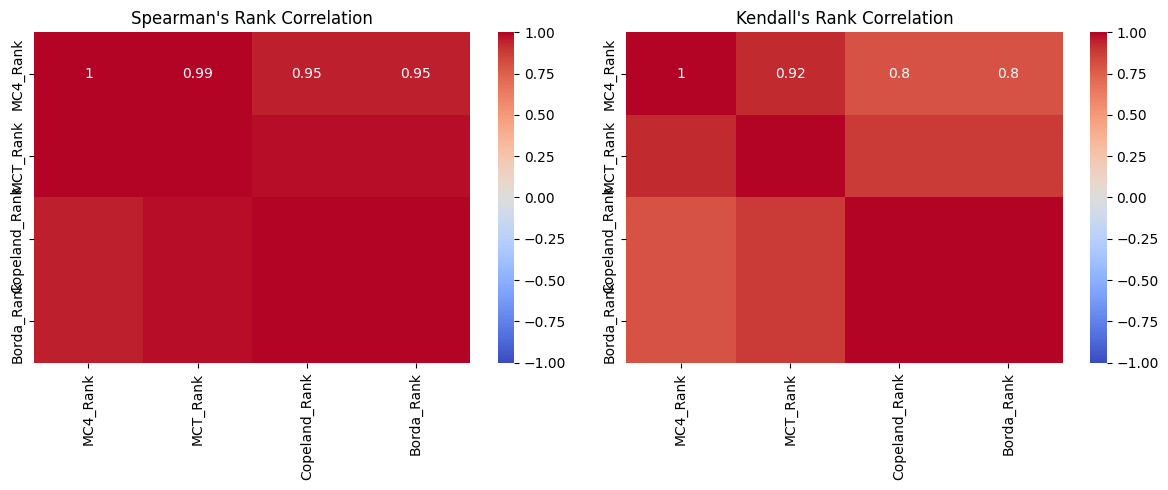

Spearman's Rank Correlation:
               MC4_Rank  MCT_Rank  Copeland_Rank  Borda_Rank
MC4_Rank       1.000000  0.992201       0.948972    0.948972
MCT_Rank       0.992201  1.000000       0.979968    0.979967
Copeland_Rank  0.948972  0.979968       1.000000    1.000000
Borda_Rank     0.948972  0.979967       1.000000    1.000000

Kendall's Rank Correlation:
               MC4_Rank  MCT_Rank  Copeland_Rank  Borda_Rank
MC4_Rank       1.000000  0.922445       0.800271    0.800279
MCT_Rank       0.922445  1.000000       0.877783    0.877793
Copeland_Rank  0.800271  0.877783       1.000000    0.999987
Borda_Rank     0.800279  0.877793       0.999987    1.000000


In [111]:
# Validation - Correlation with Spearman's and Kendall's

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV files
mc4_mct = pd.read_csv(r"C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Aggregation Model\cattle_ranked_by_mc4_aggregation.csv")
copeland = pd.read_csv(r"C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Aggregation Model\cattle_ranked_by_copeland_aggregation.csv")
borda = pd.read_csv(r"C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Aggregation Model\cattle_ranked_by_borda_aggregation.csv")

# Merge the dataframes
merged_df = mc4_mct.merge(copeland[['Protein', 'Copeland_Rank']], on='Protein', how='inner')
merged_df = merged_df.merge(borda[['Protein', 'Borda_Rank']], on='Protein', how='inner')

# Select only the rank columns
rank_df = merged_df[['MC4_Rank', 'MCT_Rank', 'Copeland_Rank', 'Borda_Rank']]

# Calculate Spearman's rank correlation
spearman_corr = rank_df.corr(method='spearman')

# Calculate Kendall's rank correlation
kendall_corr = rank_df.corr(method='kendall')

# Visualize the correlations
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman's Rank Correlation")

plt.subplot(122)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Kendall's Rank Correlation")

plt.tight_layout()
plt.show()

# Print the correlation matrices
print("Spearman's Rank Correlation:")
print(spearman_corr)
print("\nKendall's Rank Correlation:")
print(kendall_corr)

In [115]:
#Validation - Kemeny's Score - Borda's

import pandas as pd
import numpy as np
from ranky import borda
from itertools import combinations

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load individual rankings
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

# Combine ranks into a single DataFrame
rankings = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    rankings = rankings.merge(df[['Protein', df.columns[-1]]], on='Protein', how='outer')
    rankings = rankings.rename(columns={df.columns[-1]: col})

# Prepare data for Borda count
rank_matrix = rankings[rank_columns].values

# Apply Borda count
borda_scores = borda(rank_matrix, axis=1, method='mean', reverse=True)

# Calculate Borda ranks
borda_ranks = pd.Series(borda_scores).rank(method='min')

# Add Borda results to the rankings DataFrame
rankings['Borda_Rank'] = borda_ranks

# Sort by Borda rank
results = rankings.sort_values('Borda_Rank')

# Kemeny's score calculation
def kemeny_score(ranking1, ranking2):
    score = 0
    n = len(ranking1)
    for i, j in combinations(range(n), 2):
        if (ranking1.iloc[i] < ranking1.iloc[j] and ranking2.iloc[i] > ranking2.iloc[j]) or \
           (ranking1.iloc[i] > ranking1.iloc[j] and ranking2.iloc[i] < ranking2.iloc[j]):
            score += 1
    return score

# Calculate Kemeny's score for Borda method against the original rankings
kemeny_scores = {}
for original_method in rank_columns:
    kemeny_scores[f'Borda_vs_{original_method}'] = kemeny_score(results['Borda_Rank'], results[original_method])

# Print Kemeny's scores
print("Kemeny's Scores for Borda method:")
for method, score in kemeny_scores.items():
    print(f"{method}: {score}")

# Save results and Kemeny's scores
output_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_aggregation_with_kemeny.xlsx'

with pd.ExcelWriter(output_file) as writer:
    results.to_excel(writer, sheet_name='Rankings', index=False)
    pd.DataFrame.from_dict(kemeny_scores, orient='index', columns=['Score']).to_excel(writer, sheet_name='Kemeny Scores')

print(f"\nResults and Kemeny scores saved to {output_file}")

Kemeny's Scores for Borda method:
Borda_vs_VIKOR_Rank: 3379931
Borda_vs_EDAS_Rank: 5639358
Borda_vs_SPOTIS_Rank: 3558600
Borda_vs_Final_Rank_Score: 3558563
Borda_vs_Final_Rank_Rank: 6199223

Results and Kemeny scores saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_aggregation_with_kemeny.xlsx


In [116]:
# Validation - Kemeny's Score - Copeland

import pandas as pd
import numpy as np
from itertools import combinations

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load and combine ranks into a single DataFrame
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: col})

# Prepare rank matrix for Copeland method
rank_matrix = combined_ranks[rank_columns].values

# Apply Copeland method with more precision
def copeland_with_precision(rank_matrix, precision=1e-10):
    n_alternatives, n_methods = rank_matrix.shape
    wins = np.zeros((n_alternatives, n_alternatives))
    for i in range(n_methods):
        for j in range(n_alternatives):
            for k in range(j + 1, n_alternatives):
                if rank_matrix[j, i] < rank_matrix[k, i]:
                    wins[j, k] += 1 + precision * (rank_matrix[k, i] - rank_matrix[j, i])
                elif rank_matrix[j, i] > rank_matrix[k, i]:
                    wins[k, j] += 1 + precision * (rank_matrix[j, i] - rank_matrix[k, i])
    return np.sum(wins, axis=1) - np.sum(wins, axis=0)

copeland_scores = copeland_with_precision(rank_matrix)

# Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks['Protein'],
    'Copeland_Score': copeland_scores
})

# Assign Copeland ranks (lower rank is better)
results['Copeland_Rank'] = results['Copeland_Score'].rank(method='first', ascending=False).astype(int)

# Sort by Copeland rank
results = results.sort_values('Copeland_Rank')

# Kemeny's score calculation
def kemeny_score(ranking1, ranking2):
    score = 0
    n = len(ranking1)
    for i, j in combinations(range(n), 2):
        if (ranking1.iloc[i] < ranking1.iloc[j] and ranking2.iloc[i] > ranking2.iloc[j]) or \
           (ranking1.iloc[i] > ranking1.iloc[j] and ranking2.iloc[i] < ranking2.iloc[j]):
            score += 1
    return score

# Calculate Kemeny's score for Copeland method against the original rankings
kemeny_scores = {}
for original_method in rank_columns:
    kemeny_scores[f'Copeland_vs_{original_method}'] = kemeny_score(results['Copeland_Rank'], combined_ranks[original_method])

# Print Kemeny's scores
print("Kemeny's Scores for Copeland method:")
for method, score in kemeny_scores.items():
    print(f"{method}: {score}")

# Save results and Kemeny's scores
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland_aggregation_with_kemeny.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Copeland Rankings', index=False)
    pd.DataFrame.from_dict(kemeny_scores, orient='index', columns=['Score']).to_excel(writer, sheet_name='Kemeny Scores')

print(f"\nResults and Kemeny scores saved to: {output_path}")

Kemeny's Scores for Copeland method:
Copeland_vs_VIKOR_Rank: 0
Copeland_vs_EDAS_Rank: 8691633
Copeland_vs_SPOTIS_Rank: 368399
Copeland_vs_Final_Rank_Score: 368500
Copeland_vs_Final_Rank_Rank: 9322366

Results and Kemeny scores saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland_aggregation_with_kemeny.xlsx


In [117]:
# Validation - Kemeny's Score - MC4 and MCT

import pandas as pd
import numpy as np
from mc4.algorithm import mc4_aggregator
from itertools import combinations

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load and combine ranks into a single DataFrame
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: col})

# Set 'Protein' as index
combined_ranks.set_index('Protein', inplace=True)

# Apply MC4 and MCT algorithms
aggregated_ranks_mc4 = mc4_aggregator(combined_ranks, header_row=0, index_col=0, algo='mc4')
aggregated_ranks_mct = mc4_aggregator(combined_ranks, header_row=0, index_col=0, algo='mct',
                                      precision=1e-8, iterations=300, erg_number=0.2)

# Create results DataFrame
results = pd.DataFrame({
    'Protein': combined_ranks.index,
    'MC4_Rank': pd.Series(aggregated_ranks_mc4),
    'MCT_Rank': pd.Series(aggregated_ranks_mct)
})

# Sort by MC4 rank
results = results.sort_values('MC4_Rank')

# Kemeny's score calculation
def kemeny_score(ranking1, ranking2):
    score = 0
    n = len(ranking1)
    for i, j in combinations(range(n), 2):
        if (ranking1.iloc[i] < ranking1.iloc[j] and ranking2.iloc[i] > ranking2.iloc[j]) or \
           (ranking1.iloc[i] > ranking1.iloc[j] and ranking2.iloc[i] < ranking2.iloc[j]):
            score += 1
    return score

# Calculate Kemeny's score for MC4 and MCT methods against the original rankings
kemeny_scores = {}
for method in ['MC4', 'MCT']:
    for original_method in rank_columns:
        kemeny_scores[f'{method}_vs_{original_method}'] = kemeny_score(results[f'{method}_Rank'], combined_ranks[original_method])

# Print Kemeny's scores
print("Kemeny's Scores for MC4 and MCT methods:")
for method, score in kemeny_scores.items():
    print(f"{method}: {score}")

# Save results and Kemeny's scores
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_aggregation_with_kemeny.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Aggregated Rankings', index=False)
    pd.DataFrame.from_dict(kemeny_scores, orient='index', columns=['Score']).to_excel(writer, sheet_name='Kemeny Scores')

print(f"\nResults and Kemeny scores saved to: {output_path}")

Kemeny's Scores for MC4 and MCT methods:
MC4_vs_VIKOR_Rank: 0
MC4_vs_EDAS_Rank: 8691633
MC4_vs_SPOTIS_Rank: 368399
MC4_vs_Final_Rank_Score: 368500
MC4_vs_Final_Rank_Rank: 9322366
MCT_vs_VIKOR_Rank: 1286750
MCT_vs_EDAS_Rank: 8667291
MCT_vs_SPOTIS_Rank: 1551427
MCT_vs_Final_Rank_Score: 1551420
MCT_vs_Final_Rank_Rank: 9281454

Results and Kemeny scores saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_aggregation_with_kemeny.xlsx


In [5]:
import pandas as pd
import numpy as np
from itertools import combinations
from ranky import borda
from mc4.algorithm import mc4_aggregator
from scipy.stats import kendalltau, spearmanr
from sklearn.model_selection import KFold

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load individual rankings
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

# Combine ranks into a single DataFrame
combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: col})

# Aggregation methods
def copeland_method(rank_matrix):
    n_alternatives, n_methods = rank_matrix.shape
    wins = np.zeros((n_alternatives, n_alternatives))
    for i in range(n_methods):
        for j in range(n_alternatives):
            for k in range(j + 1, n_alternatives):
                if rank_matrix[j, i] < rank_matrix[k, i]:
                    wins[j, k] += 1
                elif rank_matrix[j, i] > rank_matrix[k, i]:
                    wins[k, j] += 1
    scores = np.sum(wins, axis=1) - np.sum(wins, axis=0)
    return pd.Series(scores).rank(method='min', ascending=False)

def borda_method(rank_matrix):
    scores = borda(rank_matrix, axis=1, method='mean', reverse=True)
    return pd.Series(scores).rank(method='min')

def mc4_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mc4'))

def mct_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mct',
                                    precision=1e-8, iterations=300, erg_number=0.2))

aggregation_methods = {
    'Copeland': copeland_method,
    'Borda': borda_method,
    'MC4': mc4_method,
    'MCT': mct_method
}

# Consensus-based cross-validation
def consensus_cross_validation(data, methods, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {method: {'kendall': [], 'spearman': []} for method in aggregation_methods.keys()}

    for train_index, test_index in kf.split(methods):
        train_methods = [methods[i] for i in train_index]
        test_methods = [methods[i] for i in test_index]

        print(f"\nTrain methods: {train_methods}")
        print(f"Test methods: {test_methods}")

        train_matrix = data[train_methods].values

        for agg_method_name, agg_method_func in aggregation_methods.items():
            print(f"\nAggregation method: {agg_method_name}")
            print(f"Train matrix shape: {train_matrix.shape}")
            print(f"Train matrix sample:\n{train_matrix[:5, :]}")

            try:
                consensus_ranking = agg_method_func(train_matrix)

                for test_method in test_methods:
                    test_ranking = data[test_method]

                    # Ensure both rankings have the same index
                    common_index = consensus_ranking.index.intersection(test_ranking.index)
                    consensus_subset = consensus_ranking.loc[common_index]
                    test_subset = test_ranking.loc[common_index]

                    results[agg_method_name]['kendall'].append(kendalltau(consensus_subset, test_subset)[0])
                    results[agg_method_name]['spearman'].append(spearmanr(consensus_subset, test_subset)[0])
            except Exception as e:
                print(f"Error in {agg_method_name} method: {str(e)}")

    return results

# Perform consensus-based cross-validation
cv_results = consensus_cross_validation(combined_ranks[rank_columns], rank_columns)

# Analyze and present results
print("\nConsensus-based Cross-validation Results:")
for method, metrics in cv_results.items():
    if metrics['kendall'] and metrics['spearman']:
        print(f"\n{method} Method:")
        print(f"  Average Kendall's Tau: {np.mean(metrics['kendall']):.4f} (±{np.std(metrics['kendall']):.4f})")
        print(f"  Average Spearman's Correlation: {np.mean(metrics['spearman']):.4f} (±{np.std(metrics['spearman']):.4f})")
    else:
        print(f"\n{method} Method: No valid results")

# Save results
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\aggregation_cross_validation_results.xlsx'

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for method, metrics in cv_results.items():
        pd.DataFrame(metrics).to_excel(writer, sheet_name=method)

print(f"\nDetailed results saved to: {output_path}")


Train methods: ['VIKOR_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']
Test methods: ['EDAS_Rank']

Aggregation method: Copeland
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: Borda
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: MC4
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: MCT
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Train methods: ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score']
Test methods: ['Final_Rank_Rank']

In [6]:
# Validation - Consensus Based Cross Validation - Further Analysis

import pandas as pd
import numpy as np
from itertools import combinations
from ranky import rk
from mc4.algorithm import mc4_aggregator
from scipy.stats import kendalltau, spearmanr, friedmanchisquare
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load individual rankings
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

# Combine ranks into a single DataFrame
combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: col})

# Aggregation methods
def copeland_method(rank_matrix):
    n_alternatives, n_methods = rank_matrix.shape
    wins = np.zeros((n_alternatives, n_alternatives))
    for i in range(n_methods):
        for j in range(n_alternatives):
            for k in range(j + 1, n_alternatives):
                if rank_matrix[j, i] < rank_matrix[k, i]:
                    wins[j, k] += 1
                elif rank_matrix[j, i] > rank_matrix[k, i]:
                    wins[k, j] += 1
    scores = np.sum(wins, axis=1) - np.sum(wins, axis=0)
    return pd.Series(scores).rank(method='min', ascending=False)

def borda_method(rank_matrix):
    scores = borda(rank_matrix, axis=1, method='mean', reverse=True)
    return pd.Series(scores).rank(method='min')

def mc4_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mc4'))

def mct_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mct',
                                    precision=1e-8, iterations=300, erg_number=0.2))

aggregation_methods = {
    'Copeland': copeland_method,
    'Borda': borda_method,
    'MC4': mc4_method,
    'MCT': mct_method
}

def advanced_consensus_cross_validation(data, methods, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {method: {'kendall': [], 'spearman': [], 'top10_overlap': [], 'bottom10_overlap': []}
               for method in aggregation_methods.keys()}
    fold_results = []

    for fold, (train_index, test_index) in enumerate(kf.split(methods)):
        train_methods = [methods[i] for i in train_index]
        test_methods = [methods[i] for i in test_index]

        print(f"\nFold {fold + 1}")
        print(f"Train methods: {train_methods}")
        print(f"Test methods: {test_methods}")

        train_matrix = data[train_methods].values

        fold_data = {}
        for agg_method_name, agg_method_func in aggregation_methods.items():
            try:
                print(f"\nAggregation method: {agg_method_name}")
                print(f"Train matrix shape: {train_matrix.shape}")
                print(f"Train matrix sample:\n{train_matrix[:5, :]}")

                consensus_ranking = agg_method_func(train_matrix)

                fold_metrics = {'method': agg_method_name, 'fold': fold}
                for test_method in test_methods:
                    test_ranking = data[test_method]

                    common_index = consensus_ranking.index.intersection(test_ranking.index)
                    consensus_subset = consensus_ranking.loc[common_index]
                    test_subset = test_ranking.loc[common_index]

                    kendall, _ = kendalltau(consensus_subset, test_subset)
                    spearman, _ = spearmanr(consensus_subset, test_subset)

                    results[agg_method_name]['kendall'].append(kendall)
                    results[agg_method_name]['spearman'].append(spearman)

                    # Top and bottom 10 overlap
                    top10_consensus = set(consensus_subset.nsmallest(10).index)
                    top10_test = set(test_subset.nsmallest(10).index)
                    bottom10_consensus = set(consensus_subset.nlargest(10).index)
                    bottom10_test = set(test_subset.nlargest(10).index)

                    results[agg_method_name]['top10_overlap'].append(len(top10_consensus.intersection(top10_test)) / 10)
                    results[agg_method_name]['bottom10_overlap'].append(len(bottom10_consensus.intersection(bottom10_test)) / 10)

                    fold_metrics[f'kendall_{test_method}'] = kendall
                    fold_metrics[f'spearman_{test_method}'] = spearman
                    fold_metrics[f'top10_overlap_{test_method}'] = len(top10_consensus.intersection(top10_test)) / 10
                    fold_metrics[f'bottom10_overlap_{test_method}'] = len(bottom10_consensus.intersection(bottom10_test)) / 10

                fold_data[agg_method_name] = consensus_ranking
                fold_results.append(fold_metrics)

            except Exception as e:
                print(f"Error in {agg_method_name} method: {str(e)}")

    return results, pd.DataFrame(fold_results), fold_data

# Perform advanced consensus-based cross-validation
cv_results, fold_df, last_fold_data = advanced_consensus_cross_validation(combined_ranks[rank_columns], rank_columns)

# Analyze and present results
print("\nAdvanced Consensus-based Cross-validation Results:")
for method, metrics in cv_results.items():
    print(f"\n{method} Method:")
    print(f"  Average Kendall's Tau: {np.mean(metrics['kendall']):.4f} (±{np.std(metrics['kendall']):.4f})")
    print(f"  Average Spearman's Correlation: {np.mean(metrics['spearman']):.4f} (±{np.std(metrics['spearman']):.4f})")
    print(f"  Average Top 10 Overlap: {np.mean(metrics['top10_overlap']):.4f} (±{np.std(metrics['top10_overlap']):.4f})")
    print(f"  Average Bottom 10 Overlap: {np.mean(metrics['bottom10_overlap']):.4f} (±{np.std(metrics['bottom10_overlap']):.4f})")

# Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='method', y='value', data=fold_df.melt(id_vars=['method', 'fold'], value_vars=[col for col in fold_df.columns if col.startswith('kendall')], var_name='metric', value_name='value'))
plt.title("Distribution of Kendall's Tau across folds")
plt.savefig('kendall_distribution.png')
plt.close()

plt.figure(figsize=(12, 6))
sns.heatmap(fold_df.groupby('method')[['kendall_' + m for m in rank_columns]].mean(), annot=True, cmap='YlGnBu')
plt.title("Average Kendall's Tau for each method and test ranking")
plt.savefig('kendall_heatmap.png')
plt.close()

# Statistical test
kendall_values = [cv_results[method]['kendall'] for method in aggregation_methods.keys()]
friedman_statistic, p_value = friedmanchisquare(*kendall_values)
print(f"\nFriedman test for difference between methods: statistic={friedman_statistic:.4f}, p-value={p_value:.4f}")

# Comparison of Copeland and Borda
copeland_ranking = last_fold_data['Copeland']
borda_ranking = last_fold_data['Borda']
print("\nComparison of Copeland and Borda rankings:")
print(f"Kendall's Tau: {kendalltau(copeland_ranking, borda_ranking)[0]:.4f}")
print(f"Spearman's Correlation: {spearmanr(copeland_ranking, borda_ranking)[0]:.4f}")
print(f"Top 10 overlap: {len(set(copeland_ranking.nsmallest(10).index).intersection(set(borda_ranking.nsmallest(10).index))) / 10:.2f}")
print(f"Bottom 10 overlap: {len(set(copeland_ranking.nlargest(10).index).intersection(set(borda_ranking.nlargest(10).index))) / 10:.2f}")

# Save detailed results
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\advanced_aggregation_analysis_results.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    pd.DataFrame(cv_results).to_excel(writer, sheet_name='Summary')
    fold_df.to_excel(writer, sheet_name='Fold_Details')
    for method, ranking in last_fold_data.items():
        ranking.to_excel(writer, sheet_name=f'{method}_LastFold')

print(f"\nDetailed results and visualizations saved.")


Fold 1
Train methods: ['VIKOR_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']
Test methods: ['EDAS_Rank']

Aggregation method: Copeland
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: Borda
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: MC4
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Aggregation method: MCT
Train matrix shape: (8147, 4)
Train matrix sample:
[[   1   13   13    4]
 [   2  191  191   51]
 [   3 2175 2175  756]
 [   4  552  552   43]
 [   5  299  299  456]]

Fold 2
Train methods: ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score']
Test methods: ['Fin

In [7]:
# Validation - Bootstrapping - Gaussian Noise

import pandas as pd
import numpy as np
from itertools import combinations
from ranky import rk
from mc4.algorithm import mc4_aggregator
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
vikor_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_VIKOR.xlsx'
edas_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_EDAS.xlsx'
spotis_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\cattle_ranked_by_SPOTIS.xlsx'
ranky_score_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyscore.xlsx'
ranky_rank_file = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\Individual Datasets\ranked_by_rankyrank.xlsx'

# Load individual rankings
dfs = [pd.read_excel(file) for file in [vikor_file, edas_file, spotis_file, ranky_score_file, ranky_rank_file]]
rank_columns = ['VIKOR_Rank', 'EDAS_Rank', 'SPOTIS_Rank', 'Final_Rank_Score', 'Final_Rank_Rank']

# Combine ranks into a single DataFrame
combined_ranks = dfs[0][['Protein', 'VIKOR_Rank']]
for df, col in zip(dfs[1:], rank_columns[1:]):
    combined_ranks = combined_ranks.merge(df[['Protein', df.columns[-1]]], on='Protein')
    combined_ranks = combined_ranks.rename(columns={df.columns[-1]: col})

# Aggregation methods
def copeland_method(rank_matrix):
    n_alternatives, n_methods = rank_matrix.shape
    wins = np.zeros((n_alternatives, n_alternatives))
    for i in range(n_methods):
        for j in range(n_alternatives):
            for k in range(j + 1, n_alternatives):
                if rank_matrix[j, i] < rank_matrix[k, i]:
                    wins[j, k] += 1
                elif rank_matrix[j, i] > rank_matrix[k, i]:
                    wins[k, j] += 1
    scores = np.sum(wins, axis=1) - np.sum(wins, axis=0)
    return pd.Series(scores).rank(method='min', ascending=False)

def borda_method(rank_matrix):
    scores = borda(rank_matrix, axis=1, method='mean', reverse=True)
    return pd.Series(scores).rank(method='min')

def mc4_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mc4'))

def mct_method(rank_matrix):
    return pd.Series(mc4_aggregator(pd.DataFrame(rank_matrix), header_row=None, index_col=None, algo='mct',
                                    precision=1e-8, iterations=300, erg_number=0.2))

aggregation_methods = {
    'Copeland': copeland_method,
    'Borda': borda_method,
    'MC4': mc4_method,
    'MCT': mct_method
}

def add_gaussian_noise(rankings, noise_level=0.05):
    """Add Gaussian noise to rankings."""
    noisy_rankings = rankings.copy()
    noise = np.random.normal(0, noise_level * rankings.shape[0], rankings.shape)
    noisy_rankings += noise
    return noisy_rankings.argsort().argsort()

def add_rank_swaps(rankings, swap_probability=0.05):
    """Randomly swap adjacent ranks."""
    noisy_rankings = rankings.copy()
    for i in range(len(rankings) - 1):
        if np.random.random() < swap_probability:
            noisy_rankings[i], noisy_rankings[i+1] = noisy_rankings[i+1], noisy_rankings[i]
    return noisy_rankings

def add_outliers(rankings, outlier_probability=0.01, outlier_magnitude=100):
    """Introduce occasional large changes in rank."""
    noisy_rankings = rankings.copy()
    outliers = np.random.choice([0, 1], size=rankings.shape, p=[1-outlier_probability, outlier_probability])
    noisy_rankings += outliers * np.random.randint(-outlier_magnitude, outlier_magnitude, size=rankings.shape)
    return noisy_rankings.argsort().argsort()

def introduce_ties(rankings, tie_probability=0.05):
    """Introduce ties by assigning the same rank to multiple items."""
    noisy_rankings = rankings.copy()
    for i in range(len(rankings) - 1):
        if np.random.random() < tie_probability:
            noisy_rankings[i+1] = noisy_rankings[i]
    return noisy_rankings

def simulate_missing_data(rankings, missing_probability=0.05):
    """Randomly remove some rankings."""
    mask = np.random.choice([True, False], size=rankings.shape, p=[1-missing_probability, missing_probability])
    noisy_rankings = np.ma.array(rankings, mask=mask)
    return noisy_rankings

def apply_noise(data, noise_type, **kwargs):
    """Apply specified noise type to all rankings."""
    noise_functions = {
        'gaussian': add_gaussian_noise,
        'rank_swaps': add_rank_swaps,
        'outliers': add_outliers,
        'ties': introduce_ties,
        'missing_data': simulate_missing_data
    }
    return data.apply(lambda x: noise_functions[noise_type](x, **kwargs))

def evaluate_with_noise(data, methods, noise_type, n_iterations=100, **kwargs):
    results = {method: {'kendall': [], 'spearman': []} for method in aggregation_methods.keys()}

    for _ in range(n_iterations):
        noisy_data = apply_noise(data, noise_type, **kwargs)

        for agg_method_name, agg_method_func in aggregation_methods.items():
            try:
                aggregated_ranking = agg_method_func(noisy_data.values)

                for original_method in methods:
                    original_ranking = data[original_method]
                    kendall, _ = kendalltau(aggregated_ranking, original_ranking)
                    spearman, _ = spearmanr(aggregated_ranking, original_ranking)

                    results[agg_method_name]['kendall'].append(kendall)
                    results[agg_method_name]['spearman'].append(spearman)

            except Exception as e:
                print(f"Error in {agg_method_name} method: {str(e)}")

    return results

# Evaluate with different noise types
noise_types = ['gaussian', 'rank_swaps', 'outliers', 'ties', 'missing_data']
noise_params = {
    'gaussian': {'noise_level': 0.05},
    'rank_swaps': {'swap_probability': 0.05},
    'outliers': {'outlier_probability': 0.01, 'outlier_magnitude': 100},
    'ties': {'tie_probability': 0.05},
    'missing_data': {'missing_probability': 0.05}
}

evaluation_results = {}

for noise_type in noise_types:
    print(f"\nEvaluating with {noise_type} noise")
    evaluation_results[noise_type] = evaluate_with_noise(
        combined_ranks[rank_columns],
        rank_columns,
        noise_type,
        n_iterations=100,
        **noise_params[noise_type]
    )

# Visualize results
plt.figure(figsize=(15, 10))
for i, noise_type in enumerate(noise_types):
    plt.subplot(2, 3, i+1)
    for method in aggregation_methods.keys():
        sns.kdeplot(evaluation_results[noise_type][method]['kendall'], label=method)
    plt.title(f"Kendall's Tau Distribution - {noise_type.capitalize()} Noise")
    plt.xlabel("Kendall's Tau")
    plt.legend()
plt.tight_layout()
plt.savefig('noise_type_comparisons.png')
plt.close()

# Print summary statistics
print("\nSummary of Evaluation Results:")
for noise_type in noise_types:
    print(f"\nNoise Type: {noise_type}")
    for method, metrics in evaluation_results[noise_type].items():
        print(f"  {method} Method:")
        print(f"    Average Kendall's Tau: {np.mean(metrics['kendall']):.4f} (±{np.std(metrics['kendall']):.4f})")
        print(f"    Average Spearman's Correlation: {np.mean(metrics['spearman']):.4f} (±{np.std(metrics['spearman']):.4f})")

# Save detailed results
output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\bootstrap_guassian_noise_validation_results.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for noise_type, results in evaluation_results.items():
        df = pd.DataFrame({(method, metric): values
                           for method, metrics in results.items()
                           for metric, values in metrics.items()})
        df.to_excel(writer, sheet_name=f'Noise_{noise_type}')

print(f"\nDetailed results saved to: {output_path}")


Evaluating with gaussian noise


In [ ]:
# Validation - Agreement Index

In [ ]:
# Validation - Meta Aggregation with Correlation